# [Classification: k-Nearest Neighbors  ](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm)

## Data import

In [1]:
import pandas as pd
df = pd.read_csv('diabetes.csv')
#any further infos on the diabetes dataset:
#https://www.kaggle.com/uciml/pima-indians-diabetes-database

The datasets consist of several medical predictor (independent) variables and one target (dependent) variable, Outcome. Independent variables include the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

- Pregnancies:  Number of times pregnant
- Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- BloodPressure: Diastolic blood pressure (mm Hg)
- SkinThickness: Triceps skin fold thickness (mm)
- Insulin: 2-Hour serum insulin (mu U/ml)
- BMI: Body mass index (weight in kg/(height in m)^2)
- DiabetesPedigreeFunction: Diabetes pedigree function
- Age: (years)
- Outcome


In [2]:
df.shape

(768, 9)

## Exploratory Data Analysis

In [3]:
df.info(verbose=True)
# Shows an overview of the dataset, including data types and any missing values.
# gives information about the data types,columns, null value counts, memory usage etc

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timespreg  768 non-null    int64  
 1   gluctol    768 non-null    int64  
 2   diaspb     768 non-null    int64  
 3   triceps    768 non-null    int64  
 4   insulin    768 non-null    int64  
 5   massindex  768 non-null    float64
 6   pedigree   768 non-null    float64
 7   age        768 non-null    int64  
 8   target     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.isna().sum()
# The code df.isna().sum() is used to check for any missing values in each column of the DataFrame df.

# df.isna(): This part of the code generates a new DataFrame of the same shape as df, where each cell contains
# True if the original cell in df was NaN (missing) and False otherwise.

# .sum(): When applied to a DataFrame of boolean values (True and False),
# .sum() will count True values in each column. Since True is treated as 1 and False as 0, the result is the number of missing values for each column.

,0
timespreg,0
gluctol,0
diaspb,0
triceps,0
insulin,0
massindex,0
pedigree,0
age,0
target,0


In [5]:
df.describe(include="all")
# basic statistic details about the data
# Provides a statistical summary of the dataset.

,timespreg,gluctol,diaspb,triceps,insulin,massindex,pedigree,age,target
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Axes: >

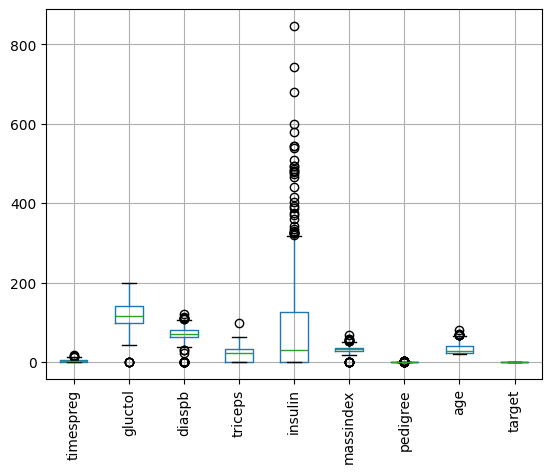

In [6]:
%matplotlib inline
df.boxplot(rot=90)

array([[<Axes: title={'center': 'timespreg'}>,
        <Axes: title={'center': 'gluctol'}>,
        <Axes: title={'center': 'diaspb'}>],
       [<Axes: title={'center': 'triceps'}>,
        <Axes: title={'center': 'insulin'}>,
        <Axes: title={'center': 'massindex'}>],
       [<Axes: title={'center': 'pedigree'}>,
        <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'target'}>]], dtype=object)

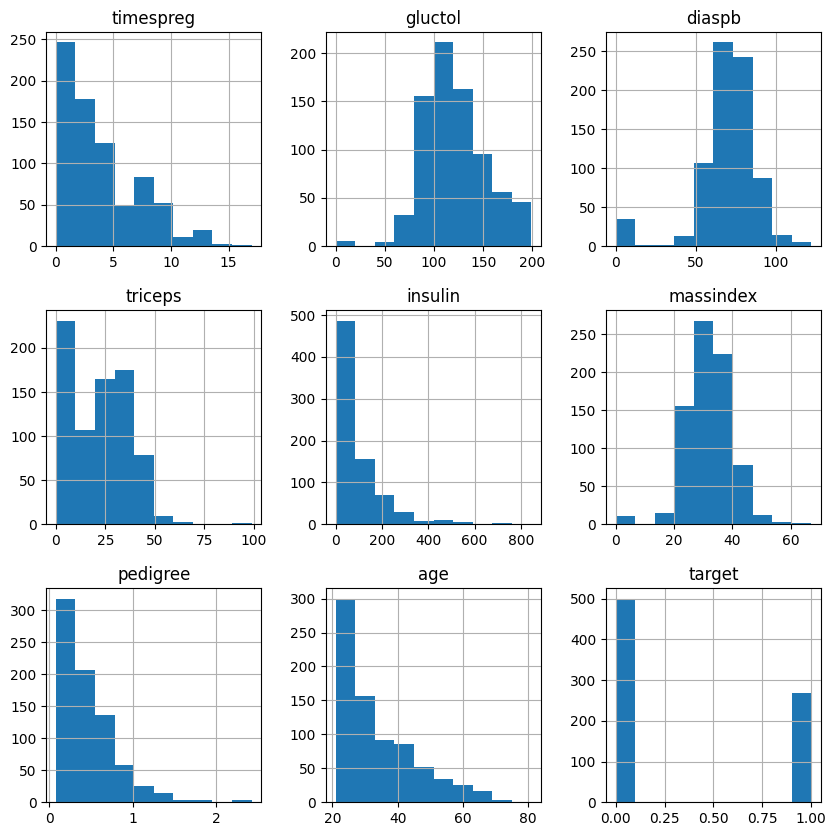

In [7]:
df.hist(figsize=(10,10))

target
0    500
1    268
dtype: int64


<Axes: title={'center': 'Distribution of target'}, xlabel='target'>

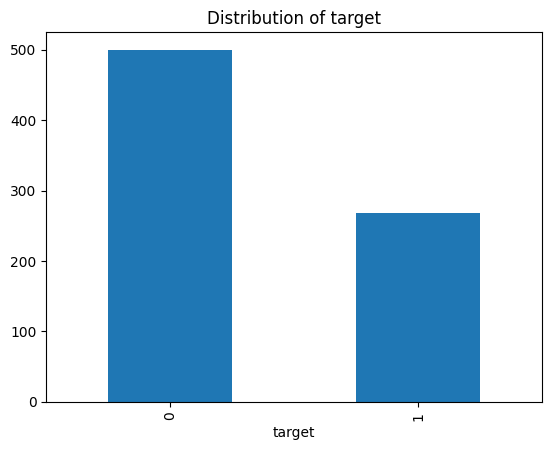

In [8]:
# Print class freq. through pandas: we group the data by the column target and we count the number of rows

# df.groupby('target') groups the dataset by the values in the target column,
# which is often used to indicate the classification or outcome in a dataset.

# .size() returns the count of rows for each group (each unique value in the target column).
target_dist=df.groupby('target').size()
print(target_dist)

#some imports to plot
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Visualize Class Counts
target_dist.plot.bar(x='',y='',title='Distribution of target')

- `target_dist = df.groupby('target').size()`: This line groups the DataFrame `df` by the `target` column. The `size()` function counts the number of occurrences of each class (0 or 1 in the case of a binary classification). The result is a Pandas Series (`target_dist`) where the index represents the class labels, and the values represent the count of samples in each class.
- `print(target_dist)`: This line outputs the `target_dist` Series to the console, allowing you to see how many samples belong to each class in the target variable. This is important for understanding the distribution of the classes in your dataset, which can impact the performance of your machine learning model.

## Data Preparation

### Separate Train/Test sets

In [9]:
# Separate X and y (explanatory variables and target variable)

# X = df.iloc[:, :-1] selects all columns in df except the last one.
# The : specifies all rows, while :-1 means all columns except the last one.
# This selection assigns the explanatory variables (features) to X.
X = df.iloc[:,:-1]

# y = df.iloc[:, -1] selects only the last column of df, which is typically the target variable in a dataset.
# Again, iloc is used to select all rows in the last column, indicated by -1.
y = df.iloc[:,-1] #[-1]]

X.head()
y.head()

,target
0,1
1,0
2,1
3,0
4,1


In [10]:
from sklearn.model_selection import train_test_split

#SPLIT DATA INTO TRAIN AND TEST SET
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size =0.30, #by default is 75%-25%
                                                    #shuffle is set True by default,
                                                    stratify=y,
                                                    random_state= 123
                                                   ) #fix random seed for replicability

print(X_train.shape,X_test.shape)

(537, 8) (231, 8)


- `X_train, X_test, y_train, y_test = train_test_split(...)` This line calls the `train_test_split` function to split the feature set `X` and the target variable `y` into four separate sets:

    - X_train: Features for the training set.
    - X_test: Features for the testing set.
    - y_train: Target variable for the training set.
    - y_test: Target variable for the testing set.

- `test_size=0.30`: This parameter specifies the proportion of the dataset to include in the test set. Here, 30% of the data will be allocated for testing, while the remaining 70% will be used for training the model. The default split is often 75%-25%, but this can be adjusted based on the specific needs of the analysis.

- `stratify=y`: This parameter ensures that the proportion of classes in the target variable y is preserved in both the training and testing sets. This is particularly important for imbalanced datasets, where certain classes might have significantly more instances than others. By stratifying the split, you ensure that both sets have a similar class distribution, which is crucial for reliable model evaluation.

- `random_state=123`: This parameter sets the random seed for the random number generator used during the split. By fixing the random seed, you ensure that every time the code is run, the same split is generated, making your results reproducible. This is essential for validating model performance consistently across different runs.

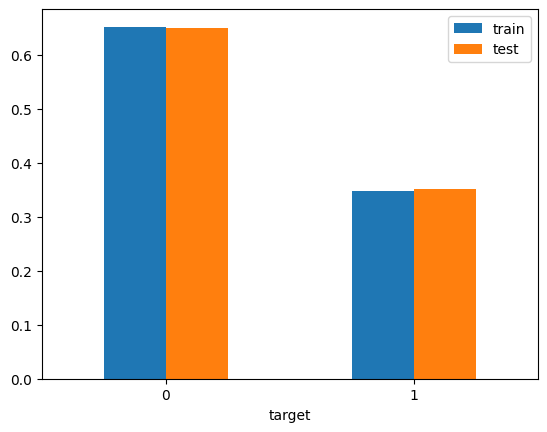

In [11]:
y_train_dist=y_train.groupby(y_train.iloc[:]).size()/y_train.size
y_test_dist=y_test.groupby(y_test.iloc[:]).size()/y_test.size

# train_test_dist is a new DataFrame that stores the class distributions for both training (train) and testing (test) sets,
# making it easy to compare them side by side.

train_test_dist = pd.DataFrame({'train': y_train_dist, 'test': y_test_dist})
ax = train_test_dist.plot.bar(rot=0) # rotation of the labels

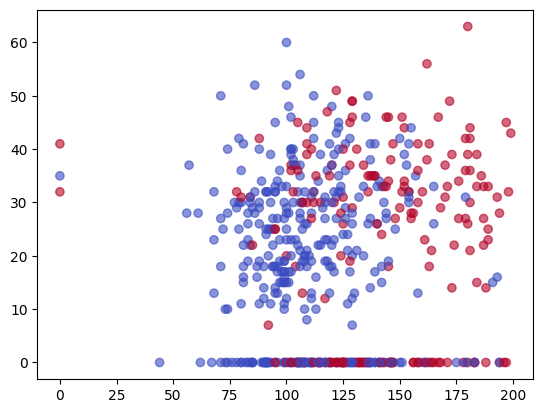

In [12]:
import matplotlib.pyplot as plt

# X_train.iloc[:, 1] selects the second column in X_train (Python indexing starts at 0), and this is assigned to x1.
# X_train.iloc[:, 3] selects the fourth column in X_train and assigns it to x2.
# This setup allows you to visualize the relationship between these two features,
# with each point in the scatter plot representing a data point in the training set.

x1 = X_train.iloc[:,1]
x2 = X_train.iloc[:,3]

plt.scatter(x1, x2,alpha=0.6,c=y_train,cmap='coolwarm' )
plt.show()

This code snippet demonstrates how to create a scatter plot to visualize the relationship between two features in the training dataset. By plotting `x1` and `x2` while coloring the points based on the target variable `y_train`, we can quickly observe how different classes are distributed across these features.  
Scatter plots are a powerful tool for exploratory data analysis, allowing for insights into potential correlations and class separations, which are crucial when selecting features for machine learning models.

# A first model: K-Nearest Neighbor

The K-Nearest Neighbor classification model simply assign to new observation the most common value among its k-nearest neighbors

![KNN](KnnClassification.svg)

In [13]:
#DEFINE YOUR CLASSIFIER and THE PARAMETERS GRID
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

#Create KNN Classifier
knn40 = KNeighborsClassifier(n_neighbors=40)

#Train the model using the training sets
knn40.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn40.predict(X_test)


- This line initializes a KNN classifier and assigns it to the variable `knn40`. The parameter `n_neighbors=40` specifies that the classifier will consider the 40 nearest neighbors when making predictions.
- Choosing the right number of neighbors is crucial, as it affects the model's accuracy and ability to generalize to unseen data. A higher number of neighbors may smooth out predictions but could also overlook local patterns in the data.
- `.fit(X_train, y_train)`: This method trains the KNN classifier using the training data (`X_train`) and corresponding labels (`y_train`).
- During training, the model stores the feature vectors and their corresponding labels. Since KNN is a lazy learner, it does not create a model in the traditional sense; rather, it memorizes the training data for future predictions.
- `knn40.predict(X_test)`: This method uses the trained KNN classifier to predict the labels for the test dataset (`X_test`).
- The predicted labels are stored in the variable `y_pred`. For each instance in `X_test`, the classifier identifies the 40 nearest neighbors from the training set, assigns the most common class among those neighbors to the test instance, and thus makes its prediction.

In [14]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

1. Predictions from the Classifier:

- After training the KNN model with `X_train` and `y_train`, when you call `knn40.predict(X_test)`, the model evaluates each instance in `X_test`.
- For each instance in `X_test`, the model identifies the 40 nearest neighbors from the training data and predicts the label based on the majority class among those neighbors.
- As a result, `y_pred` is an array or list containing the predicted class labels for each instance in `X_test`.

2. Output Format:

- If `y_train` is a binary classification problem (e.g., labels 0 and 1), then `y_pred` will contain either 0s or 1s corresponding to the predicted classes for each sample in `X_test`.
- If it is a multi-class classification problem, `y_pred` will include class labels for each instance, which could be integers representing different categories.

3. Example Output:

- If `y_pred` contains `[0, 1, 0, 0, 1]`, this means:
    - The first instance in `X_test` is predicted to belong to class `0`.
    - The second instance is predicted to belong to class `1`.
    - The third instance is predicted to belong to class `0`.
    - And so on for the rest of the instances.

### Classification measures

![ClassMeasures](classification_measures.png)

[[141   9]
 [ 57  24]]


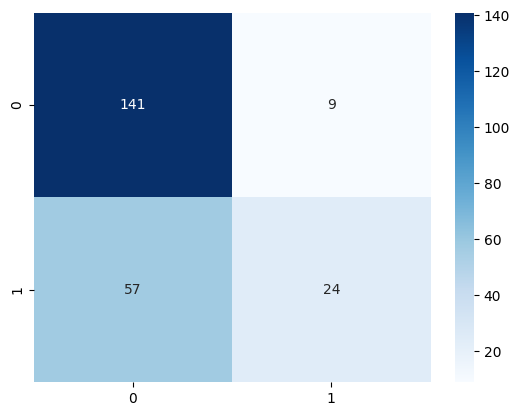

In [15]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Blues"); #annot=True to annotate cells fmt: format
plt.show()

# rows: true values
# column: predicted
# e.g. [0,1] false positives (9)

- `confusion_matrix(y_test, y_pred)`: This function takes the true labels (`y_test`) and the predicted labels (`y_pred`) as arguments and returns the confusion matrix.
- The confusion matrix is a table that summarizes the performance of a classification algorithm. It provides insight into how many instances were correctly or incorrectly classified for each class.
- The printed confusion matrix will look something like this for a binary classification problem
    - TN (True Negatives): Correctly predicted as negative.
    - FP (False Positives): Incorrectly predicted as positive.
    - FN (False Negatives): Incorrectly predicted as negative.
    - TP (True Positives): Correctly predicted as positive.

In [16]:
#EVALUATE OUR PREDICTION
from sklearn import metrics
print('***RESULTS ON TEST SET***')

# F1 score
# metrics.f1_score(y_test, y_pred) computes the F1 score, which is the harmonic mean of precision and recall.
# It is particularly useful when you need a balance between precision (the accuracy of positive predictions)
# and recall (the ability to find all positive instances).
# The F1 score ranges from 0 to 1, where 1 indicates perfect precision and recall.
print("F1_score: ",metrics.f1_score(y_test, y_pred))

# Accuracy
# metrics.accuracy_score(y_test, y_pred) calculates the overall accuracy of the model,
# which is the proportion of correct predictions (both true positives and true negatives)
# among the total number of cases examined.
# Accuracy can be misleading in imbalanced datasets, so it's often used in conjunction with other metrics.
print("Accuracy",metrics.accuracy_score(y_test, y_pred))

# Recall
# metrics.recall_score(y_test, y_pred) computes recall, which measures the model's ability
# to correctly identify positive instances.
# It is calculated as the ratio of true positives to the sum of true positives and false negatives.
# Recall is particularly important in contexts where missing a positive case is critical, such as in medical diagnoses.
print("Recall",metrics.recall_score(y_test, y_pred))

***RESULTS ON TEST SET***
F1_score:  0.42105263157894735
Accuracy 0.7142857142857143
Recall 0.2962962962962963


## Searching the best parameters

#### DEFINE YOUR GRIDSEARCH

GS perfoms an exhaustive search over specified parameter values for an estimator.  
GS uses a Stratified K-Folds cross-validator
(The folds are made by preserving the percentage of samples for each class.)

Some Parameters:

- estimator : estimator object.
- param_grid : dict or list of dictionaries

- scoring : scoring parameter
- n_jobs : Number of jobs to run in parallel. -1 means using all processors
- cv : cross-validation generator (default 3-fold cross validation)
- verbose : Controls the verbosity: the higher, the more messages.


In [17]:
from sklearn.model_selection import GridSearchCV

#Create KNN Classifier
classifier = KNeighborsClassifier()
parameters = {'n_neighbors':np.arange(1,40)}
# parameters is created to specify the hyperparameters to be tuned.
# n_neighbors: This parameter defines the number of neighbors to consider when classifying a data point.
# np.arange(1, 40) generates an array of integers from 1 to 39,
# meaning the grid search will test KNN models with different values of n_neighbors within this range.

gs = GridSearchCV(classifier, parameters, cv=3, scoring = 'f1', verbose=90, n_jobs=-1)

In [18]:
# TRAIN YOUR CLASSIFIER
# Ensure data type is correct for all features
print(X_train.dtypes)  # Ensure all are numerical (int or float)
# Ensure data type is correct for all features
print(y_train.dtypes)  # Ensure all are numerical (int or float)

gs = gs.fit(X_train, y_train)

# This line fits the GridSearchCV object (gs) to the training data X_train and y_train.
# The grid search will start evaluating all specified hyperparameter combinations (in this case, different values of n_neighbors).
# During this process, it will perform cross-validation (as specified by cv=3),
# calculate the F1 score for each combination, and identify the best hyperparameter based on that score.

timespreg      int64
gluctol        int64
diaspb         int64
triceps        int64
insulin        int64
massindex    float64
pedigree     float64
age            int64
dtype: object
int64
Fitting 3 folds for each of 39 candidates, totalling 117 fits


Once the grid search is complete, we can analyze the results to identify the best hyperparameters and assess the model’s performance using the optimized settings. Understanding and implementing hyperparameter tuning is crucial for improving model accuracy and generalizability in machine learning projects.

In [19]:
# summarize the results of your GRIDSEARCH
# gs.best_score_: Represents the highest mean cross-validated score
# (in this case, the F1 score) obtained during the grid search.
print("Best score: %f using %s" % (gs.best_score_, gs.best_params_))

means = gs.cv_results_['mean_test_score']
stds = gs.cv_results_['std_test_score']
params = gs.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("Mean %f Std (%f) with: %r" % (mean, stdev, param))

Best score: 0.599885 using {'n_neighbors': 7}
Mean 0.503441 Std (0.011175) with: {'n_neighbors': 1}
Mean 0.416544 Std (0.032890) with: {'n_neighbors': 2}
Mean 0.523167 Std (0.053226) with: {'n_neighbors': 3}
Mean 0.477595 Std (0.068925) with: {'n_neighbors': 4}
Mean 0.557810 Std (0.058966) with: {'n_neighbors': 5}
Mean 0.549743 Std (0.041694) with: {'n_neighbors': 6}
Mean 0.599885 Std (0.044016) with: {'n_neighbors': 7}
Mean 0.562180 Std (0.027379) with: {'n_neighbors': 8}
Mean 0.582689 Std (0.038996) with: {'n_neighbors': 9}
Mean 0.528314 Std (0.049196) with: {'n_neighbors': 10}
Mean 0.571196 Std (0.063104) with: {'n_neighbors': 11}
Mean 0.533911 Std (0.072331) with: {'n_neighbors': 12}
Mean 0.558187 Std (0.051875) with: {'n_neighbors': 13}
Mean 0.513482 Std (0.083722) with: {'n_neighbors': 14}
Mean 0.545210 Std (0.078716) with: {'n_neighbors': 15}
Mean 0.512032 Std (0.082881) with: {'n_neighbors': 16}
Mean 0.510927 Std (0.064095) with: {'n_neighbors': 17}
Mean 0.484862 Std (0.079813)

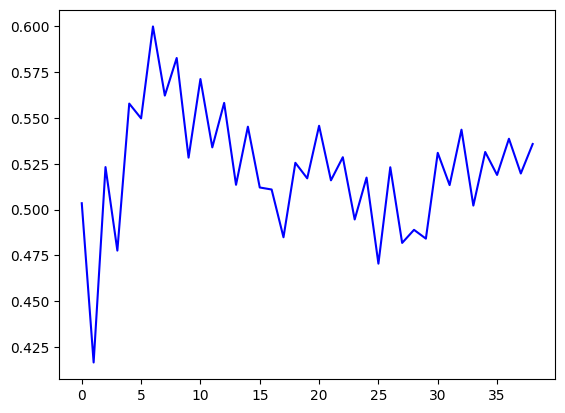

0.5998848467508062


In [20]:
import matplotlib.pyplot as plt

plt.plot (means, color='blue', alpha=1.00)
plt.show()

print(gs.best_score_)

In [21]:
# TEST ON YOUR TEST SET
# best_estimator_ attribute contains the model trained with the optimal hyperparameters found during the grid search.
# best_model is now an instance of the KNeighborsClassifier (or whichever classifier was used) with the best hyperparameter settings.

best_model = gs.best_estimator_

y_pred_train = best_model.predict(X_train)
y_pred = best_model.predict(X_test)

In [22]:
#This is your prediction on the TEST SET
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In [23]:
#EVALUATE YOUR PREDICTION IN THE TRAINING SET
y_pred_train = best_model.predict(X_train)

print('***RESULTS ON TRAIN SET***')
print("precision: ", metrics.precision_score(y_train, y_pred_train)) # tp / (tp + fp)
print("recall: ", metrics.recall_score(y_train, y_pred_train)) # tp / (tp + fn)
print("f1_score: ", metrics.f1_score(y_train, y_pred_train)) #F1 = 2 * (precision * recall) / (precision + recall)
print("accuracy: ", metrics.accuracy_score(y_train, y_pred_train)) # (tp+tn)/m

***RESULTS ON TRAIN SET***
precision:  0.7300613496932515
recall:  0.6363636363636364
f1_score:  0.68
accuracy:  0.7914338919925512


In [24]:
#EVALUATE YOUR PREDICTION IN THE TEST SET
from sklearn import metrics

print('***RESULTS ON TEST SET***')
print("precision: ", metrics.precision_score(y_test, y_pred)) # tp / (tp + fp)
print("recall: ", metrics.recall_score(y_test, y_pred)) # tp / (tp + fn)
print("f1_score: ", metrics.f1_score(y_test, y_pred)) #F1 = 2 * (precision * recall) / (precision + recall)
print("accuracy: ", metrics.accuracy_score(y_test, y_pred)) # (tp+tn)/m

***RESULTS ON TEST SET***
precision:  0.6388888888888888
recall:  0.5679012345679012
f1_score:  0.6013071895424836
accuracy:  0.7359307359307359


In [25]:
# PRINT SOME FURTHER METRICS
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.83      0.80       150
           1       0.64      0.57      0.60        81

    accuracy                           0.74       231
   macro avg       0.71      0.70      0.70       231
weighted avg       0.73      0.74      0.73       231



This line calls the `classification_report` function with the true labels (`y_test`) and the predicted labels (`y_pred`) from the model's predictions.
The output of this function includes several key metrics for each class in the target variable, as well as overall statistics:

- `Precision`: The ratio of correctly predicted positive observations to the total predicted positives. It indicates how many of the positively predicted cases were actually positive.
- `Recall` (Sensitivity): The ratio of correctly predicted positive observations to the all actual positives. It indicates how many actual positive cases were captured by the model.
- `F1 Score`: The weighted average of precision and recall. This score is useful for imbalanced classes, as it gives a balance between precision and recall.
- Support: The number of actual occurrences of the class in the specified dataset. It indicates how many instances of each class were present in the test set.
- `Accuracy`: The overall accuracy of the model, which is calculated as the ratio of correctly predicted instances to the total instances.

In [26]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[124  26]
 [ 35  46]]


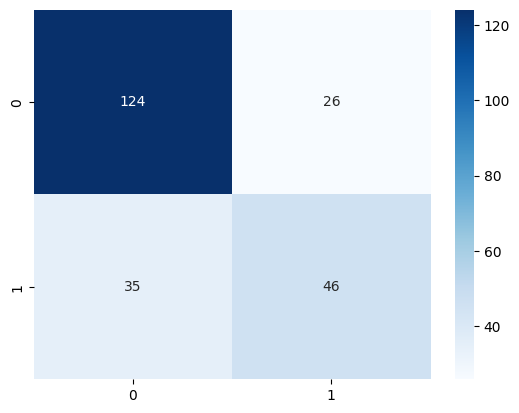

In [27]:
# Plot normalized confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Blues"); #annot=True to annotate cells fmt: format
plt.show()


## [ROC Curve](https://en.wikipedia.org/wiki/Receiver_operating_characteristic)

![ROCcurve](roc_auc.png)

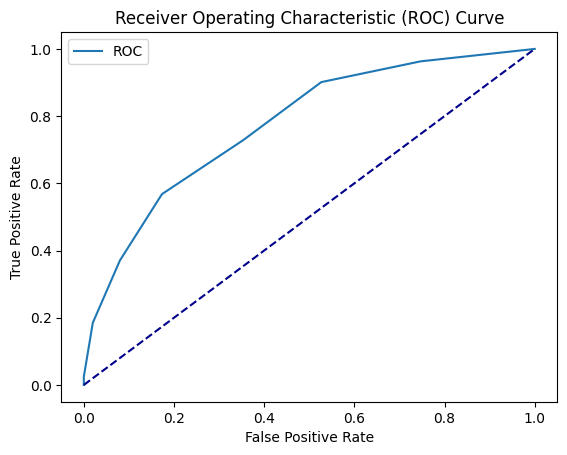

AUC: 0.77


In [28]:
model = KNeighborsClassifier(n_neighbors=7)
# This line code creates a KNN classifier with n_neighbors set to 7.
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

y_probs = model.predict_proba(X_test)
# predict_proba gives the probabilities for the target (0 and 1 in your case)
# predict_proba returns the predicted probabilities for each class.
# In this case, y_probs[:, 1] extracts the probabilities of the positive class
# (usually denoted as class 1).
# These probabilities are used for ROC analysis.

fpr, tpr, thresholds=metrics.roc_curve(y_test,  y_probs[:,1])
# roc_curve computes the false positive rate (FPR) and true positive rate (TPR) for various
# threshold values,
# which are necessary to plot the ROC curve.
# FPR: The rate of incorrectly predicted positive instances (false positives).
# TPR (or recall): The rate of correctly predicted positive instances (true positives).

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

auc = metrics.roc_auc_score(y_test, y_probs[:,1])
print('AUC: %.2f' % auc)

### Train test curve

![TrainTestCurve](under_overfit.png)

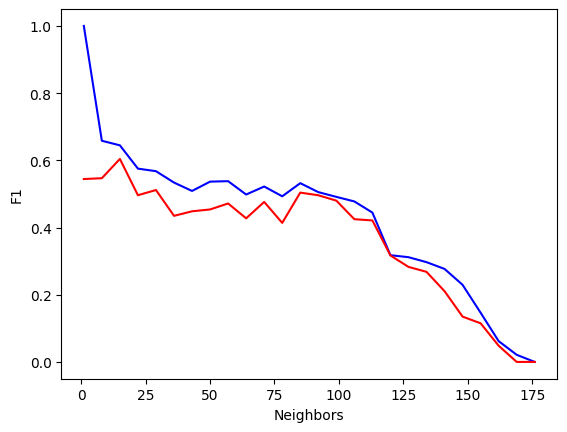

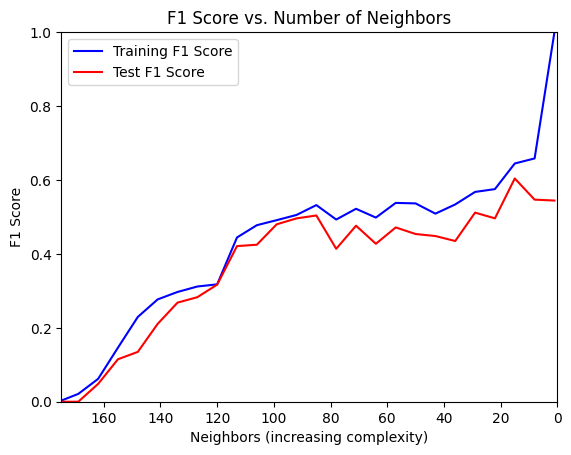

In [29]:
score_train=[]
score_test=[]

neighbors=range(1,180,7)

for i in neighbors:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    y_pred_train = knn.predict(X_train)
    y_pred_test = knn.predict(X_test)
    score_train.append( metrics.f1_score(y_train, y_pred_train))
    score_test.append( metrics.f1_score(y_test, y_pred_test))

plt.xlabel('Neighbors')
plt.ylabel('F1')
plt.plot (neighbors,score_train, color='blue', alpha=1.00)
plt.plot (neighbors,score_test, color='red', alpha=1.00)
plt.show()

plt.plot(neighbors, score_train, color='blue', alpha=1.00, label='Training F1 Score')
plt.plot(neighbors, score_test, color='red', alpha=1.00, label='Test F1 Score')
plt.xlabel('Neighbors (increasing complexity)')
plt.ylabel('F1 Score')
plt.xlim(175, 0)  # Displays neighbors in decreasing order
plt.ylim(0, 1)    # Sets the y-axis limits to the range of F1 scores
plt.legend()      # Adds a legend to distinguish between training and test scores
plt.title('F1 Score vs. Number of Neighbors')
plt.show()


This code snippet evaluates the performance of a K-Nearest Neighbors (KNN) classifier for different values of the number of neighbors (n_neighbors). It calculates and plots the F1 score for both the training and test datasets.

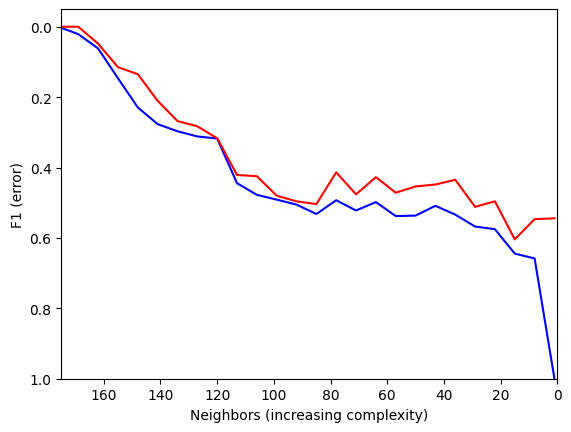

In [30]:
plt.plot (neighbors,score_train, color='blue', alpha=1.00)
plt.plot (neighbors,score_test, color='red', alpha=1.00)
plt.xlabel('Neighbors (increasing complexity)')
plt.ylabel('F1 (error)')
plt.xlim(175,0)
plt.ylim(1,-0.05)

plt.show()

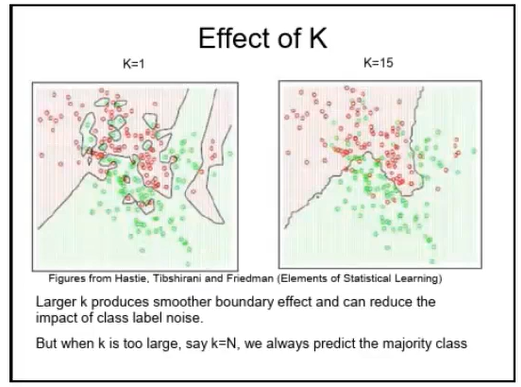

In [32]:
from IPython.display import Image
#from IPython.core.display import HTML
#Image(url= "http://web.cse.ohio-state.edu/~stiff.4/cse3521/images/effect-of-k.png")
Image(filename='effect-of-k.png')

In [33]:
model = KNeighborsClassifier(n_neighbors=90)
model.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=90)

In [34]:
#EVALUATE YOUR PREDICTION
y_pred_train = model.predict(X_train)
y_pred = model.predict(X_test)

print('***RESULTS ON TRAIN SET***')
print("precision: ", metrics.precision_score(y_train, y_pred_train)) # tp / (tp + fp)
print("recall: ", metrics.recall_score(y_train, y_pred_train)) # tp / (tp + fn)
print("f1_score: ", metrics.f1_score(y_train, y_pred_train)) #F1 = 2 * (precision * recall) / (precision + recall)
print("accuracy: ", metrics.accuracy_score(y_train, y_pred_train)) # (tp+tn)/m
print("---")
print('***RESULTS ON TEST SET***')
print("precision: ", metrics.precision_score(y_test, y_pred)) # tp / (tp + fp)
print("recall: ", metrics.recall_score(y_test, y_pred)) # tp / (tp + fn)
print("f1_score: ", metrics.f1_score(y_test, y_pred)) #F1 = 2 * (precision * recall) / (precision + recall)
print("accuracy: ", metrics.accuracy_score(y_test, y_pred)) # (tp+tn)/m


***RESULTS ON TRAIN SET***
precision:  0.7676767676767676
recall:  0.40641711229946526
f1_score:  0.5314685314685315
accuracy:  0.750465549348231
---
***RESULTS ON TEST SET***
precision:  0.6888888888888889
recall:  0.38271604938271603
f1_score:  0.49206349206349204
accuracy:  0.7229437229437229


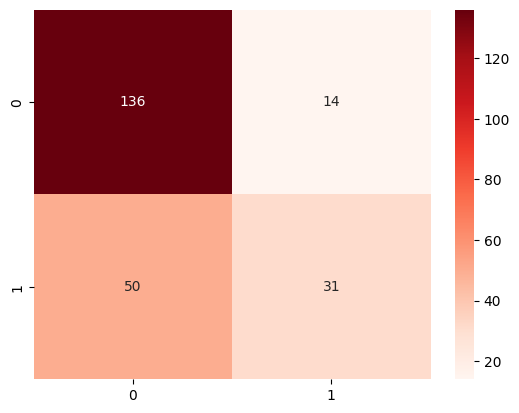

In [35]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Reds"); #annot=True to annotate cells fmt: format
plt.show()

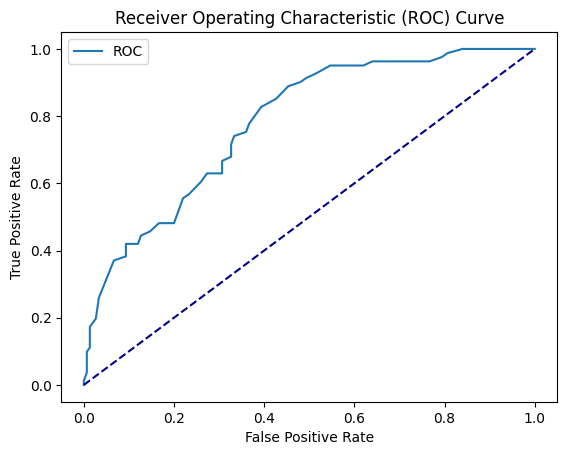

AUC: 0.78


In [36]:
y_probs = model.predict_proba(X_test) #predict_proba gives the probabilities for the target (0 and 1 in your case)

fpr, tpr, thresholds=metrics.roc_curve(y_test,  y_probs[:,1])

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

auc = metrics.roc_auc_score(y_test, y_probs[:,1])
print('AUC: %.2f' % auc)

## Scaling

<Axes: >

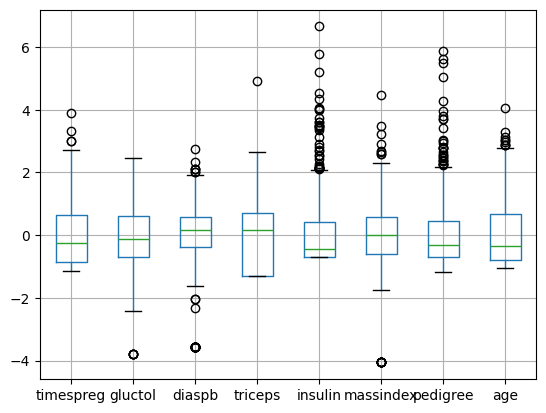

In [37]:
# Scale data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)

# We compute the scaler
scaled_data = scaler.transform(X.astype(float))
scaled_X = pd.DataFrame(scaled_data.astype(float))
scaled_X.columns = X.columns

# We apply the same scaler to the data
scaled_data = scaler.transform(X_train.astype(float))
scaled_X_train = pd.DataFrame(scaled_data.astype(float))
scaled_X_train.columns = X_train.columns

scaled_data = scaler.transform(X_test.astype(float))
scaled_X_test = pd.DataFrame(scaled_data.astype(float))
scaled_X_test.columns = X_test.columns

scaled_X.boxplot()

Fitting 3 folds for each of 140 candidates, totalling 420 fits
Best score: 0.545284 using {'n_neighbors': 15}
f1_score:  0.624113475177305
accuracy:  0.7705627705627706


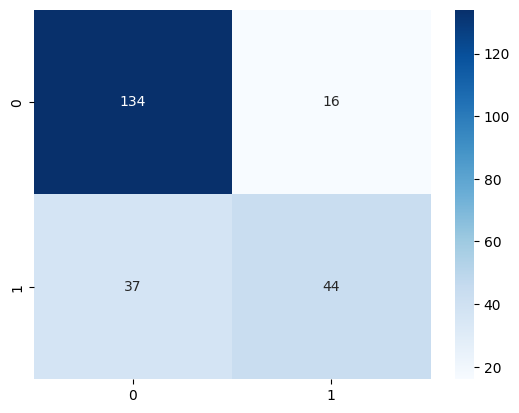

In [38]:
#DEFINE  PARAMETERS GRID
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
classifier = KNeighborsClassifier()
parameters = {'n_neighbors':np.arange(10,150)} # WE BEGIN FROM 10 TO PREVENT OVERFITTING

from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(classifier, parameters, cv=3, scoring = 'f1', verbose=50, n_jobs=-1)
gs = gs.fit(scaled_X_train, y_train)

#Prediction
print("Best score: %f using %s" % (gs.best_score_, gs.best_params_))
best_model = gs.best_estimator_
y_pred = best_model.predict(scaled_X_test)


print("f1_score: ", metrics.f1_score(y_test, y_pred))
print("accuracy: ", metrics.accuracy_score(y_test, y_pred))

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Blues"); #annot=True to annotate cells fmt: format


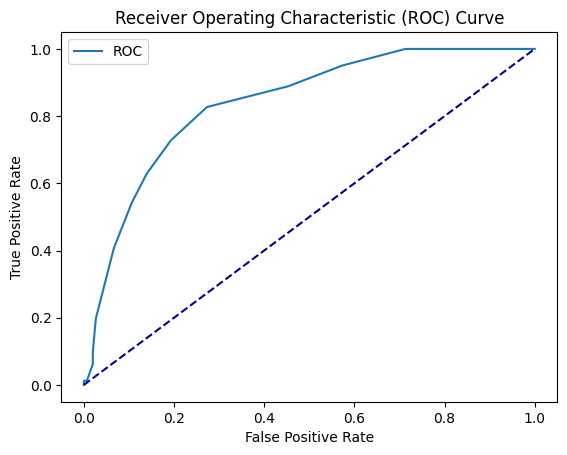

AUC: 0.84


In [39]:
model = KNeighborsClassifier(n_neighbors=15)
model.fit(scaled_X_train, y_train)
y_pred = model.predict(scaled_X_test)

y_probs = model.predict_proba(scaled_X_test) #predict_proba gives the probabilities for the target (0 and 1 in your case)

fpr, tpr, thresholds=metrics.roc_curve(y_test,  y_probs[:,1])

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

auc = metrics.roc_auc_score(y_test, y_probs[:,1])
print('AUC: %.2f' % auc)

In [40]:
y_pred_train = best_model.predict(scaled_X_train)

print('***RESULTS ON TRAIN SET***')
print("precision: ", metrics.precision_score(y_train, y_pred_train)) # tp / (tp + fp)
print("recall: ", metrics.recall_score(y_train, y_pred_train)) # tp / (tp + fn)
print("f1_score: ", metrics.f1_score(y_train, y_pred_train)) #F1 = 2 * (precision * recall) / (precision + recall)
print("accuracy: ", metrics.accuracy_score(y_train, y_pred_train)) # (tp+tn)/m
print('---')
print('***RESULTS ON TEST SET***')
print("precision: ", metrics.precision_score(y_test, y_pred)) # tp / (tp + fp)
print("recall: ", metrics.recall_score(y_test, y_pred)) # tp / (tp + fn)
print("f1_score: ", metrics.f1_score(y_test, y_pred)) #F1 = 2 * (precision * recall) / (precision + recall)
print("accuracy: ", metrics.accuracy_score(y_test, y_pred)) # (tp+tn)/m

***RESULTS ON TRAIN SET***
precision:  0.723404255319149
recall:  0.5454545454545454
f1_score:  0.6219512195121951
accuracy:  0.7690875232774674
---
***RESULTS ON TEST SET***
precision:  0.7333333333333333
recall:  0.5432098765432098
f1_score:  0.624113475177305
accuracy:  0.7705627705627706


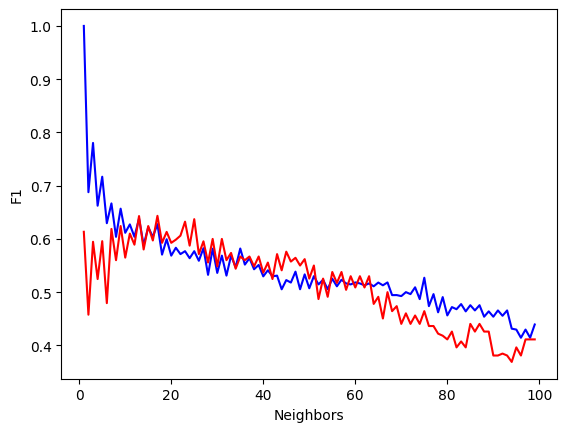

In [41]:
score_train=[]
score_test=[]

neighbors=range(1,100,1)

for i in neighbors:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(scaled_X_train,y_train)
    y_pred_train = knn.predict(scaled_X_train)
    y_pred_test = knn.predict(scaled_X_test)
    score_train.append( metrics.f1_score(y_train, y_pred_train))
    score_test.append( metrics.f1_score(y_test, y_pred_test))

plt.xlabel('Neighbors')
plt.ylabel('F1')
plt.plot (neighbors,score_train, color='blue', alpha=1.00)
plt.plot (neighbors,score_test, color='red', alpha=1.00)

plt.show()

## Apply PCA

In [42]:
#PCA fit
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(scaled_X)
df_pca = pd.DataFrame(pca.transform(scaled_X))

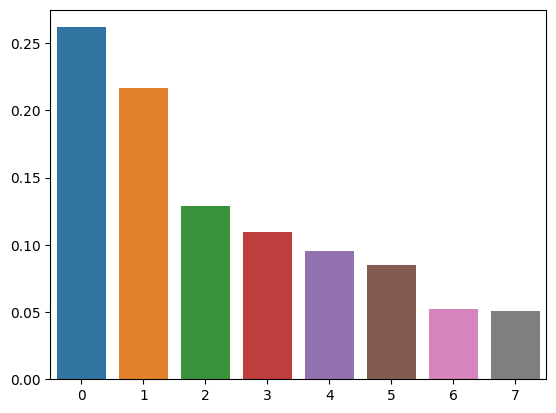

In [43]:
explained_variance=pd.DataFrame(pca.explained_variance_ratio_)
%matplotlib inline
import seaborn as sns
ax = sns.barplot( data=explained_variance.transpose())

In [44]:
pd.DataFrame(pca.components_,columns=X.columns)

,timespreg,gluctol,diaspb,triceps,insulin,massindex,pedigree,age
0,0.128432,0.393083,0.360003,0.439824,0.435026,0.451941,0.270611,0.198027
1,0.593786,0.174029,0.183892,-0.331965,-0.250781,-0.100960,-0.122069,0.620589
2,0.013087,-0.467923,0.535494,0.237674,-0.336709,0.361865,-0.433189,-0.075248
3,0.080691,-0.404329,0.055986,0.037976,-0.349944,0.053646,0.833680,0.071201
4,0.475606,-0.466328,-0.327953,0.487862,0.346935,-0.253204,-0.119810,0.109290
5,0.193598,0.094162,-0.634116,0.009589,-0.270651,0.685372,-0.085784,-0.033357
6,-0.588790,-0.060153,-0.192118,0.282213,-0.132010,-0.035366,-0.086091,0.712085
7,0.117841,0.450355,-0.011296,0.566284,-0.548621,-0.341518,-0.008259,-0.211662


In [45]:
X_pca = pd.DataFrame(data = pca.transform(scaled_X)
             ,columns = ['pc1', 'pc2','pc3','pc4','pc5', 'pc6','pc7','pc8'])

X_train_pca = pd.DataFrame(data = pca.transform(scaled_X_train)
             ,columns = ['pc1', 'pc2','pc3','pc4','pc5', 'pc6','pc7','pc8'])

X_test_pca = pd.DataFrame(data = pca.transform(scaled_X_test)
             ,columns = ['pc1', 'pc2','pc3','pc4','pc5', 'pc6','pc7','pc8'])


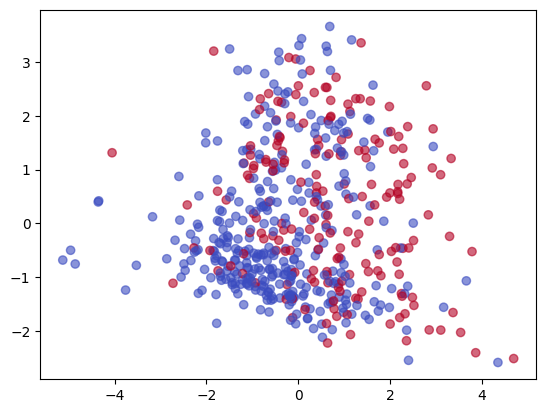

In [46]:
import matplotlib.pyplot as plt

x = X_train_pca.iloc[:,0]
y = X_train_pca.iloc[:,1]

plt.scatter(x, y,alpha=0.6,c=y_train,cmap='coolwarm' )
plt.show()

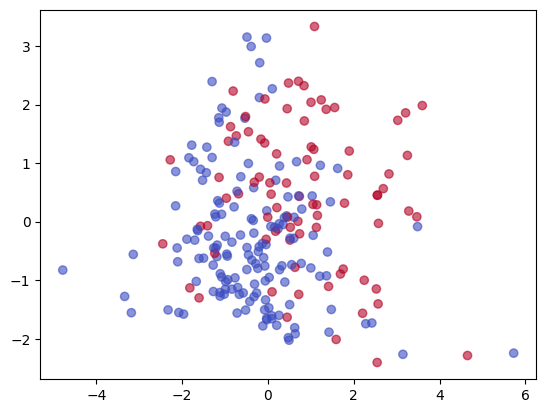

In [47]:
import matplotlib.pyplot as plt

x = X_test_pca.iloc[:,0]
y = X_test_pca.iloc[:,1]

plt.scatter(x, y,alpha=0.6,c=y_test,cmap='coolwarm' )
plt.show()

### Using two PC's

Fitting 5 folds for each of 90 candidates, totalling 450 fits
Best score: 0.496389 using {'n_neighbors': 27}
f1_score:  0.5970149253731343
accuracy:  0.7662337662337663
[[137  13]
 [ 41  40]]


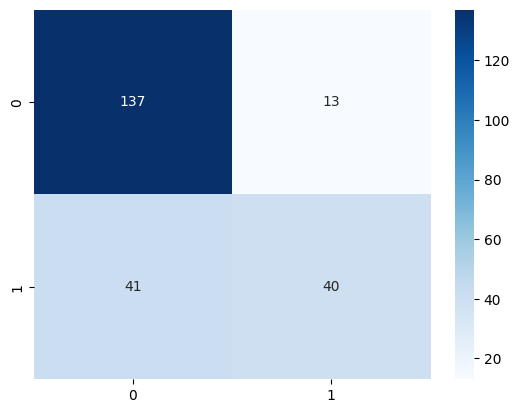

In [48]:
#DEFINE  PARAMETERS GRID
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
classifier = KNeighborsClassifier()
parameters = {'n_neighbors':np.arange(10,100)}

from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(classifier, parameters, cv=5, scoring = 'f1', verbose=50, n_jobs=-1)
# We use just the two first PC
gs = gs.fit(X_train_pca.iloc[:,:2], y_train)

#Prediction
print("Best score: %f using %s" % (gs.best_score_, gs.best_params_))
best_model = gs.best_estimator_
y_pred = best_model.predict(X_test_pca.iloc[:,:2])

print("f1_score: ", metrics.f1_score(y_test, y_pred))
print("accuracy: ", metrics.accuracy_score(y_test, y_pred))

from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Blues"); #annot=True to annotate cells fmt: format


In [49]:
y_pred_train = best_model.predict(X_train_pca.iloc[:,:2])
y_pred = best_model.predict(X_test_pca.iloc[:,:2])


print('***RESULTS ON TRAIN SET***')
print("precision: ", metrics.precision_score(y_train, y_pred_train)) # tp / (tp + fp)
print("recall: ", metrics.recall_score(y_train, y_pred_train)) # tp / (tp + fn)
print("f1_score: ", metrics.f1_score(y_train, y_pred_train)) #F1 = 2 * (precision * recall) / (precision + recall)
print("accuracy: ", metrics.accuracy_score(y_train, y_pred_train)) # (tp+tn)/m
print('---')
print('***RESULTS ON TEST SET***')
print("precision: ", metrics.precision_score(y_test, y_pred)) # tp / (tp + fp)
print("recall: ", metrics.recall_score(y_test, y_pred)) # tp / (tp + fn)
print("f1_score: ", metrics.f1_score(y_test, y_pred)) #F1 = 2 * (precision * recall) / (precision + recall)
print("accuracy: ", metrics.accuracy_score(y_test, y_pred)) # (tp+tn)/m

***RESULTS ON TRAIN SET***
precision:  0.6721311475409836
recall:  0.4385026737967914
f1_score:  0.5307443365695793
accuracy:  0.7299813780260708
---
***RESULTS ON TEST SET***
precision:  0.7547169811320755
recall:  0.49382716049382713
f1_score:  0.5970149253731343
accuracy:  0.7662337662337663


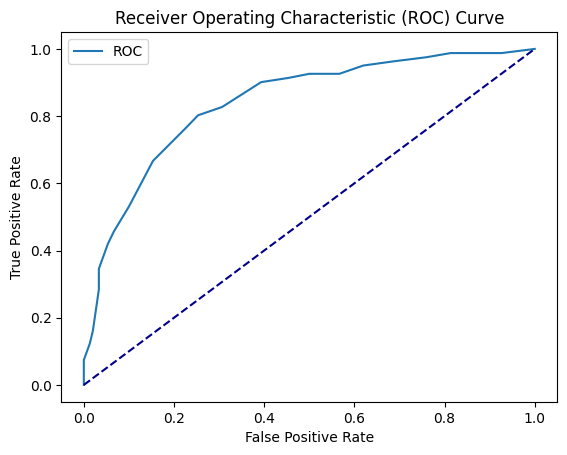

AUC: 0.84


In [50]:
#Using the three first PC
X_train_pca_2=X_train_pca.iloc[:,:3]
X_test_pca_2=X_test_pca.iloc[:,:3]

model = KNeighborsClassifier(n_neighbors=27)
model.fit(X_train_pca_2, y_train)
y_pred = model.predict(X_test_pca_2)

y_probs = model.predict_proba(X_test_pca_2) #predict_proba gives the probabilities for the target (0 and 1 in your case)

fpr, tpr, thresholds=metrics.roc_curve(y_test,  y_probs[:,1])

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

auc = metrics.roc_auc_score(y_test, y_probs[:,1])
print('AUC: %.2f' % auc)

### Using all the PC

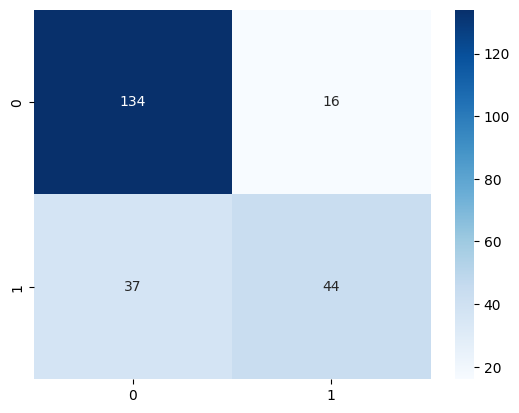

In [51]:
model = KNeighborsClassifier(n_neighbors=15)
model.fit(X_train_pca, y_train)
y_pred = model.predict(X_test_pca)

#Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Blues"); #annot=True to annotate cells fmt: format




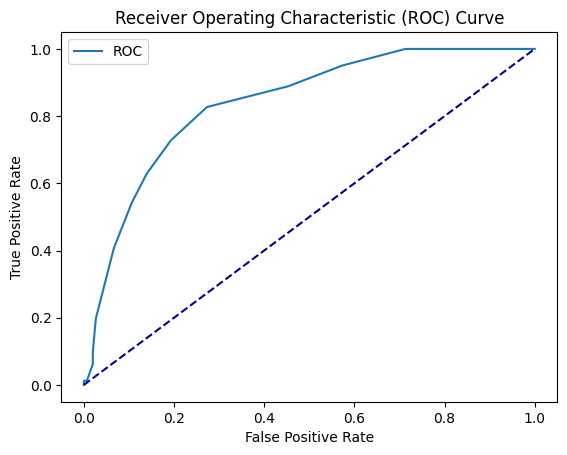

AUC: 0.84


In [52]:
#ROC
y_probs = model.predict_proba(X_test_pca) #predict_proba gives the probabilities for the target (0 and 1 in your case)

fpr, tpr, thresholds=metrics.roc_curve(y_test,  y_probs[:,1])

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

auc = metrics.roc_auc_score(y_test, y_probs[:,1])
print('AUC: %.2f' % auc)